### 1. Problème

https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Loading data

In [3]:
data = pd.read_csv('ParisHousing.csv')

### 3. Data exploration

In [4]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [5]:
data.shape

(10000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

### 4. Data visualization

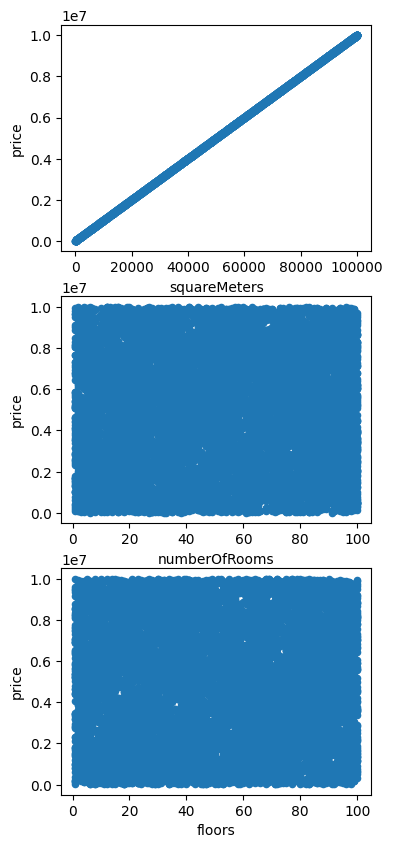

In [20]:
fig = plt.figure(figsize=(4,10))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

data.plot(x='squareMeters',y= 'price', ax=ax1, kind= 'scatter')
data.plot(x='numberOfRooms',y='price', ax=ax2, kind= 'scatter' )
data.plot(x='floors',y='price', ax=ax3, kind= 'scatter' )

plt.draw()


### 5. Correlation analysis

In [26]:
# Nous examinons la corrélation entre les variables et la cible 'price' 
data_corr = data.corr().round(2)
corr_price = data_corr['price'].sort_values(ascending=False)
print(corr_price)

squareMeters         1.00
price                1.00
numPrevOwners        0.02
cityPartRange        0.01
numberOfRooms        0.01
hasStormProtector    0.01
floors               0.00
cityCode            -0.00
basement            -0.00
attic               -0.00
hasStorageRoom      -0.00
hasGuestRoom        -0.00
hasYard             -0.01
hasPool             -0.01
isNewBuilt          -0.01
made                -0.01
garage              -0.02
Name: price, dtype: float64


### 6. Data splitting 

In [8]:
X = data.drop('price', axis=1) #data.drop(columns=['price'])
y = data.price # data['price']
print(X.shape) 
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

(10000, 16)
(10000,)


In [9]:
print(X_train.shape)
print(y_train.shape)
X_train.head()
#y_train.head()

(8000, 16)
(8000,)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
7389,21229,44,1,0,82,23820,9,6,2020,0,1,5610,4059,419,1,9
9275,21364,73,1,1,42,64233,9,1,1996,1,1,370,6597,157,0,3
2995,92877,22,1,1,57,7054,8,3,1993,0,0,5428,5905,170,1,8
5316,57132,74,1,0,70,23266,8,8,2014,0,1,671,6361,832,1,10
356,25269,88,0,0,92,86720,6,7,2019,1,1,3464,5175,693,1,1


### 7. Model training

In [32]:
regressor = LinearRegression()
#regressor.fit(X_train[['squareMeters']], y_train) # simple linear regression
regressor.fit(X_train, y_train)


print(f'Coefficient b_i = {regressor.coef_}')
print(f'Coefficient b0 = {regressor.intercept_}')


Coefficient b_i = [ 1.00000165e+02 -5.74926071e-02  3.01332313e+03  2.98574112e+03
  5.43701575e+01 -8.44308475e-04  5.35074827e+01 -3.11119609e+00
 -1.13291748e+00  1.12811336e+02  1.28874851e+02 -1.47434765e-04
 -8.09011823e-03  1.14060100e-01  1.00144898e+01 -9.26308230e+00]
Coefficient b0 = 2616.959329863079


### 8. Model evaluation

In [37]:
# Make prediction on the testing data
#y_pred = regressor.predict(X_test[['squareMeters']])
y_pred = regressor.predict(X_test)

y_pred.shape

(2000,)

In [42]:
mse = mean_squared_error(y_test,y_pred)


print(f'Mean squared error = {mse}')
print(f'Root mean squared error = {np.sqrt(mse)}')
print(f'Coefficient of determination (R^2) = {r2_score(y_test, y_pred)}')

#R^2 = 1 - SSR/SST , 
#SSR = Sum_{i=1}^{n}(ypred_i - ymean)^2
#SST = Sum_{i=1}^{n}(ytest_i - ymean)^2
#ymean = mean of the observed values


Mean squared error = 3482280.933128171
Root mean squared error = 1866.0870647234472
Coefficient of determination (R^2) = 0.999999566785081


### 9. Prediction

In [53]:
# Define and assign values to the variables for the new house
new_square_meters = 75523
new_number_of_rooms = 4  
new_has_yard = 1  
new_has_pool = 0  
new_floors = 2 
new_city_code = 9373 
new_city_part_range = 3 
new_num_prev_owners = 1  
new_construction_year = 2020  
new_is_new_built = 1  
new_has_storm_protector = 1  
new_basement = 0  
new_attic = 1  
new_garage = 1 
new_has_storage_room = 1  
new_has_guest_room = 0 

In [54]:
# Create a DataFrame for the new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
})
new_house_features.shape

(1, 16)

In [55]:
predicted_price = regressor.predict(new_house_features)
print(f'The predicted Price = {predicted_price} euros')

The predicted Price = [7556164.07180233] euros
